# 根据老师提供数据实践

In [3]:
import pandas as pd
import pprint

## 国家分省数据库分省数据准备

In [4]:
df_raw = pd.read_csv("fsnd_zb_data.tsv", encoding='utf8', sep='\t',
                    keep_default_na=False, na_values = 'na_rep',
                    index_col = [0,1,2] )
df_m = pd.read_csv("fsnd_zb_meta.tsv", encoding='utf8', sep='\t',)
df_r = pd.read_csv("reg_treeId_level2.tsv", encoding='utf8', sep='\t')
display(df_raw)
# 可以用df_raw.shape查看数据规格

data
zb      reg    sj             
A010101 110000 2018        NaN
               2017        NaN
               2016        NaN
               2015        NaN
               2014        NaN
...                        ...
A0S0B05 650000 2013  33.856600
               2012  24.914044
               2011        NaN
               2010        NaN
               2009        NaN

[908300 rows x 1 columns]

## 创建指标字典

In [5]:
指标字典 = df_m.set_index("code")['cname'].to_dict()
指标字典

{'A010101': '地级区划数',
 'A010102': '地级市数',
 'A010103': '县级区划数',
 'A010104': '市辖区数',
 'A010105': '县级市数',
 'A010106': '县数',
 'A010107': '自治县数',
 'A010108': '乡镇级区划数',
 'A010109': '镇数',
 'A01010A': '乡数',
 'A01010B': '街道办事处',
 'A010201': '三次产业法人单位数',
 'A010202': '分机构类型法人单位数',
 'A010203': '分行业法人单位数',
 'A010301': '按控股情况分企业法人单位数',
 'A010302': '按登记注册类型分企业法人单位数',
 'A020101': '地区生产总值',
 'A020102': '第一产业增加值',
 'A020103': '第二产业增加值',
 'A020104': '第三产业增加值',
 'A020105': '农林牧渔业增加值',
 'A020106': '工业增加值',
 'A020107': '建筑业增加值',
 'A020108': '批发和零售业增加值',
 'A020109': '批发和零售贸易餐饮业增加值',
 'A02010A': '交通运输、仓储和邮政业增加值',
 'A02010B': '交通运输、仓储和邮电通信业增加值',
 'A02010C': '住宿和餐饮业增加值',
 'A02010D': '金融业增加值',
 'A02010E': '房地产业增加值',
 'A02010F': '其他行业增加值',
 'A02010G': '人均地区生产总值',
 'A020201': '地区生产总值指数(上年=100)',
 'A020202': '第一产业增加值指数(上年=100)',
 'A020203': '第二产业增加值指数(上年=100)',
 'A020204': '第三产业增加值指数(上年=100)',
 'A020301': '收入法生产总值',
 'A020302': '劳动者报酬',
 'A020303': '生产税净额',
 'A020304': '固定资产折旧',
 'A020305': '营业盈余',
 'A020401': '支出法生

In [43]:
地区字典 = df_r.set_index("id")['name'].to_dict()
地区字典

{110000: '北京市',
 120000: '天津市',
 130000: '河北省',
 140000: '山西省',
 150000: '内蒙古自治区',
 210000: '辽宁省',
 220000: '吉林省',
 230000: '黑龙江省',
 310000: '上海市',
 320000: '江苏省',
 330000: '浙江省',
 340000: '安徽省',
 350000: '福建省',
 360000: '江西省',
 370000: '山东省',
 410000: '河南省',
 420000: '湖北省',
 430000: '湖南省',
 440000: '广东省',
 450000: '广西壮族自治区',
 460000: '海南省',
 500000: '重庆市',
 510000: '四川省',
 520000: '贵州省',
 530000: '云南省',
 540000: '西藏自治区',
 610000: '陕西省',
 620000: '甘肃省',
 630000: '青海省',
 640000: '宁夏回族自治区',
 650000: '新疆维吾尔自治区'}

## 数据框转换（？）

In [44]:
df = df_raw.reset_index().set_index("zb").rename(index=指标字典)
df
# zb作为索引，变为指标的字典

,reg,sj,data
zb,,,
地级区划数,110000,2018,NaN
地级区划数,110000,2017,NaN
地级区划数,110000,2016,NaN
地级区划数,110000,2015,NaN
地级区划数,110000,2014,NaN
...,...,...,...
城乡居民社会养老保险累计结余,650000,2013,33.856600
城乡居民社会养老保险累计结余,650000,2012,24.914044
城乡居民社会养老保险累计结余,650000,2011,NaN


In [45]:
df = df.reset_index().set_index("reg").rename(index=地区字典)
df

,zb,sj,data
reg,,,
北京市,地级区划数,2018,NaN
北京市,地级区划数,2017,NaN
北京市,地级区划数,2016,NaN
北京市,地级区划数,2015,NaN
北京市,地级区划数,2014,NaN
...,...,...,...
新疆维吾尔自治区,城乡居民社会养老保险累计结余,2013,33.856600
新疆维吾尔自治区,城乡居民社会养老保险累计结余,2012,24.914044
新疆维吾尔自治区,城乡居民社会养老保险累计结余,2011,NaN


In [46]:
df_zh = df.reset_index().rename(columns={"zb":"指标","reg":"地区","sj":"年","data":"数据"})
df_zh

,地区,指标,年,数据
0,北京市,地级区划数,2018,NaN
1,北京市,地级区划数,2017,NaN
2,北京市,地级区划数,2016,NaN
3,北京市,地级区划数,2015,NaN
4,北京市,地级区划数,2014,NaN
...,...,...,...,...
908295,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2013,33.856600
908296,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2012,24.914044
908297,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2011,NaN
908298,新疆维吾尔自治区,城乡居民社会养老保险累计结余,2010,NaN


* 按行业分城镇单位就业人员，全国各地区的历年变化之统计值

In [47]:
df_zh.set_index('指标').loc["城镇单位就业人员工资总额","年":"数据"]

,年,数据
指标,,
城镇单位就业人员工资总额,2018,NaN
城镇单位就业人员工资总额,2017,10675.97363
城镇单位就业人员工资总额,2016,9463.26084
城镇单位就业人员工资总额,2015,8643.54357
城镇单位就业人员工资总额,2014,7687.60206
...,...,...
城镇单位就业人员工资总额,2013,1674.73486
城镇单位就业人员工资总额,2012,1388.13884
城镇单位就业人员工资总额,2011,1124.58182


In [48]:
dslice = df_zh [ df_zh.指标.str.contains("城镇单位就业人员")]
dslice

,地区,指标,年,数据
19530,北京市,城镇单位就业人员,2018,NaN
19531,北京市,城镇单位就业人员,2017,812.8589
19532,北京市,城镇单位就业人员,2016,791.5197
19533,北京市,城镇单位就业人员,2015,777.3448
19534,北京市,城镇单位就业人员,2014,755.8601
...,...,...,...,...
56725,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2013,46636.0000
56726,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2012,45071.0000
56727,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2011,39862.0000
56728,新疆维吾尔自治区,公共管理和社会组织城镇单位就业人员平均工资,2010,35950.0000


In [49]:
指标分的可能性 = dslice.指标.unique()
指标分的可能性

array(['城镇单位就业人员', '农林牧渔业城镇单位就业人员', '采矿业城镇单位就业人员', '制造业城镇单位就业人员',
       '电力、燃气及水的生产和供应业城镇单位就业人员', '建筑业城镇单位就业人员', '交通运输、仓储及邮电通信业城镇单位就业人员',
       '信息传输、计算机服务和软件业城镇单位就业人员', '批发和零售业城镇单位就业人员', '住宿和餐饮业城镇单位就业人员',
       '金融业城镇单位就业人员', '房地产业城镇单位就业人员', '租赁和商务服务业城镇单位就业人员',
       '科学研究、技术服务和地质勘查业城镇单位就业人员', '水利、环境和公共设施管理业城镇单位就业人员',
       '居民服务和其他服务业城镇单位就业人员', '教育业城镇单位就业人员', '卫生、社会保障和社会福利业城镇单位就业人员',
       '文化、体育和娱乐业城镇单位就业人员', '公共管理和社会组织城镇单位就业人员', '城镇单位就业人员工资总额',
       '国有城镇单位就业人员工资总额', '其他城镇单位就业人员工资总额', '城镇单位就业人员工资总额指数(上年=100)',
       '国有城镇单位就业人员工资总额指数(上年=100)', '其他城镇单位就业人员工资总额指数(上年=100)',
       '城镇单位就业人员平均工资', '城镇单位就业人员平均货币工资指数(上年=100)',
       '国有城镇单位就业人员平均货币工资指数(上年=100)', '其他城镇单位就业人员平均货币工资指数(上年=100)',
       '城镇单位就业人员平均实际工资指数(上年=100)', '国有城镇单位就业人员平均实际工资指数(上年=100)',
       '其他城镇单位就业人员平均实际工资指数(上年=100)', '农、林、牧、渔业城镇单位就业人员工资总额',
       '采矿业城镇单位就业人员工资总额', '制造业城镇单位就业人员工资总额', '电力、燃气及水的生产和供应业城镇单位就业人员工资总额',
       '建筑业城镇单位就业人员工资总额', '交通运输、仓储和邮政业城镇单位就业人员工资总额',
       '信息传输、计算机服务和软件业城镇单位就业人员工资总额', 

In [50]:
指标分的可能性 = [ x.split("城镇单位就业") for x in dslice.指标.unique()]
指标分的可能性

[['', '人员'],
 ['农林牧渔业', '人员'],
 ['采矿业', '人员'],
 ['制造业', '人员'],
 ['电力、燃气及水的生产和供应业', '人员'],
 ['建筑业', '人员'],
 ['交通运输、仓储及邮电通信业', '人员'],
 ['信息传输、计算机服务和软件业', '人员'],
 ['批发和零售业', '人员'],
 ['住宿和餐饮业', '人员'],
 ['金融业', '人员'],
 ['房地产业', '人员'],
 ['租赁和商务服务业', '人员'],
 ['科学研究、技术服务和地质勘查业', '人员'],
 ['水利、环境和公共设施管理业', '人员'],
 ['居民服务和其他服务业', '人员'],
 ['教育业', '人员'],
 ['卫生、社会保障和社会福利业', '人员'],
 ['文化、体育和娱乐业', '人员'],
 ['公共管理和社会组织', '人员'],
 ['', '人员工资总额'],
 ['国有', '人员工资总额'],
 ['其他', '人员工资总额'],
 ['', '人员工资总额指数(上年=100)'],
 ['国有', '人员工资总额指数(上年=100)'],
 ['其他', '人员工资总额指数(上年=100)'],
 ['', '人员平均工资'],
 ['', '人员平均货币工资指数(上年=100)'],
 ['国有', '人员平均货币工资指数(上年=100)'],
 ['其他', '人员平均货币工资指数(上年=100)'],
 ['', '人员平均实际工资指数(上年=100)'],
 ['国有', '人员平均实际工资指数(上年=100)'],
 ['其他', '人员平均实际工资指数(上年=100)'],
 ['农、林、牧、渔业', '人员工资总额'],
 ['采矿业', '人员工资总额'],
 ['制造业', '人员工资总额'],
 ['电力、燃气及水的生产和供应业', '人员工资总额'],
 ['建筑业', '人员工资总额'],
 ['交通运输、仓储和邮政业', '人员工资总额'],
 ['信息传输、计算机服务和软件业', '人员工资总额'],
 ['批发和零售业', '人员工资总额'],
 ['住宿和餐饮业', '人员工资总额'],
 ['金融业', '人员工资总额'],
 ['房地产

## 取‘人员’，‘人员平均工资’

In [51]:
指标分的可能性_取 = [ [x,y] for (x,y) in 指标分的可能性 if (y=='人员平均工资' or y=='人员') and x!='']
指标分的可能性_取

[['农林牧渔业', '人员'],
 ['采矿业', '人员'],
 ['制造业', '人员'],
 ['电力、燃气及水的生产和供应业', '人员'],
 ['建筑业', '人员'],
 ['交通运输、仓储及邮电通信业', '人员'],
 ['信息传输、计算机服务和软件业', '人员'],
 ['批发和零售业', '人员'],
 ['住宿和餐饮业', '人员'],
 ['金融业', '人员'],
 ['房地产业', '人员'],
 ['租赁和商务服务业', '人员'],
 ['科学研究、技术服务和地质勘查业', '人员'],
 ['水利、环境和公共设施管理业', '人员'],
 ['居民服务和其他服务业', '人员'],
 ['教育业', '人员'],
 ['卫生、社会保障和社会福利业', '人员'],
 ['文化、体育和娱乐业', '人员'],
 ['公共管理和社会组织', '人员'],
 ['农、林、牧、渔业', '人员平均工资'],
 ['采矿业', '人员平均工资'],
 ['制造业', '人员平均工资'],
 ['电力、燃气及水的生产和供应业', '人员平均工资'],
 ['建筑业', '人员平均工资'],
 ['交通运输、仓储和邮政业', '人员平均工资'],
 ['信息传输、计算机服务和软件业', '人员平均工资'],
 ['批发和零售业', '人员平均工资'],
 ['住宿和餐饮业', '人员平均工资'],
 ['金融业', '人员平均工资'],
 ['房地产业', '人员平均工资'],
 ['租赁和商务服务业', '人员平均工资'],
 ['科学研究、技术服务和地质勘查业', '人员平均工资'],
 ['水利、环境和公共设施管理业', '人员平均工资'],
 ['居民服务和其他服务业', '人员平均工资'],
 ['教育', '人员平均工资'],
 ['卫生、社会保障和社会福利业', '人员平均工资'],
 ['文化、体育和娱乐业', '人员平均工资'],
 ['公共管理和社会组织', '人员平均工资']]

## 进一步切分

In [52]:
指标分的可能性_取_all = ["城镇单位就业".join(x) for x in 指标分的可能性_取]
指标分的可能性_取_all

['农林牧渔业城镇单位就业人员',
 '采矿业城镇单位就业人员',
 '制造业城镇单位就业人员',
 '电力、燃气及水的生产和供应业城镇单位就业人员',
 '建筑业城镇单位就业人员',
 '交通运输、仓储及邮电通信业城镇单位就业人员',
 '信息传输、计算机服务和软件业城镇单位就业人员',
 '批发和零售业城镇单位就业人员',
 '住宿和餐饮业城镇单位就业人员',
 '金融业城镇单位就业人员',
 '房地产业城镇单位就业人员',
 '租赁和商务服务业城镇单位就业人员',
 '科学研究、技术服务和地质勘查业城镇单位就业人员',
 '水利、环境和公共设施管理业城镇单位就业人员',
 '居民服务和其他服务业城镇单位就业人员',
 '教育业城镇单位就业人员',
 '卫生、社会保障和社会福利业城镇单位就业人员',
 '文化、体育和娱乐业城镇单位就业人员',
 '公共管理和社会组织城镇单位就业人员',
 '农、林、牧、渔业城镇单位就业人员平均工资',
 '采矿业城镇单位就业人员平均工资',
 '制造业城镇单位就业人员平均工资',
 '电力、燃气及水的生产和供应业城镇单位就业人员平均工资',
 '建筑业城镇单位就业人员平均工资',
 '交通运输、仓储和邮政业城镇单位就业人员平均工资',
 '信息传输、计算机服务和软件业城镇单位就业人员平均工资',
 '批发和零售业城镇单位就业人员平均工资',
 '住宿和餐饮业城镇单位就业人员平均工资',
 '金融业城镇单位就业人员平均工资',
 '房地产业城镇单位就业人员平均工资',
 '租赁和商务服务业城镇单位就业人员平均工资',
 '科学研究、技术服务和地质勘查业城镇单位就业人员平均工资',
 '水利、环境和公共设施管理业城镇单位就业人员平均工资',
 '居民服务和其他服务业城镇单位就业人员平均工资',
 '教育城镇单位就业人员平均工资',
 '卫生、社会保障和社会福利业城镇单位就业人员平均工资',
 '文化、体育和娱乐业城镇单位就业人员平均工资',
 '公共管理和社会组织城镇单位就业人员平均工资']

In [53]:
df_就业切片 = df_zh.set_index("指标").loc[指标分的可能性_取_all].reset_index()
df_就业切片
# 剩下11780条数据

,指标,地区,年,数据
0,农林牧渔业城镇单位就业人员,北京市,2018,NaN
1,农林牧渔业城镇单位就业人员,北京市,2017,3.4116
2,农林牧渔业城镇单位就业人员,北京市,2016,3.6867
3,农林牧渔业城镇单位就业人员,北京市,2015,3.8949
4,农林牧渔业城镇单位就业人员,北京市,2014,3.2331
...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0000
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0000
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0000
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0000


In [54]:
df_就业切片.describe(include="all")

,指标,地区,年,数据
count,11780,11780,11780.000000,10591.000000
unique,38,31,NaN,NaN
top,电力、燃气及水的生产和供应业城镇单位就业人员平均工资,福建省,NaN,NaN
freq,310,380,NaN,NaN
mean,NaN,NaN,2013.500000,25995.610415
std,NaN,NaN,2.872403,31837.310363
min,NaN,NaN,2009.000000,0.024900
25%,NaN,NaN,2011.000000,11.323850
50%,NaN,NaN,2013.500000,11478.000000
75%,NaN,NaN,2016.000000,46218.500000


## 分进合击

In [55]:
df_就业切片.groupby(['指标']).agg({"数据":["min","mean","max"]})

数据                           
                                    min          mean          max
指标                                                                
交通运输、仓储及邮电通信业城镇单位就业人员            0.5997     24.556320      85.3999
交通运输、仓储和邮政业城镇单位就业人员平均工资      25098.0000  56241.240143  116763.0000
住宿和餐饮业城镇单位就业人员                   0.3000      8.331891      39.3419
住宿和餐饮业城镇单位就业人员平均工资           13455.0000  31198.731183   61095.0000
信息传输、计算机服务和软件业城镇单位就业人员           0.2235      9.204604      77.4400
信息传输、计算机服务和软件业城镇单位就业人员平均工资   22186.0000  72507.896057  212063.0000
公共管理和社会组织城镇单位就业人员                7.8169     50.301842     116.1762
公共管理和社会组织城镇单位就业人员平均工资        25275.0000  55019.594982  128855.0000
农、林、牧、渔业城镇单位就业人员平均工资          8832.0000  30661.906810   74975.0000
农林牧渔业城镇单位就业人员                    0.3089     10.091744      93.9292
制造业城镇单位就业人员                      0.6612    145.443355    1020.2491
制造业城镇单位就业人员平均工资              21508.0000  45198.247312  106835.0000
卫生、社会保障和社会福利业城镇单位就业人员            1.3830     24.421601      65.8223
卫生、社会保障和社会福利业城镇单位就业人员平均工资    22302.0000  59073.053763  169191.0000
居民服务和其他服务业城镇单位就业人员               0.0557      2.277055      11.0436
居民服务和其他服务业城镇单位就业人员平均工资       16022.0000  35929.476703   67013.0000
建筑业城镇单位就业人员                      0.5018     72.355329     450.1977
建筑业城镇单位就业人员平均工资              16423.0000  40809.896057   99718.0000
房地产业城镇单位就业人员                     0.0249     10.849628      66.3147
房地产业城镇单位就业人员平均工资             15938.0000  45288.530466  120379.0000
批发和零售业城镇单位就业人员                   0.4833     24.356891     102.7835
批发和零售业城镇单位就业人员平均工资           16073.0000  44120.035842  139627.0000
教育业城镇单位就业人员                      3.9384     53.813387     127.4604
教育城镇单位就业人员平均工资               26175.0000  57414.487455  143215.0000
文化、体育和娱乐业城镇单位就业人员                0.5999      4.581411      19.0189
文化、体育和娱乐业城镇单位就业人员平均工资        22377.0000  54176.698925  150810.0000
水利、环境和公共设施管理业城镇单位就业人员            0.1636      8.022701      18.2523
水利、环境和公共设施管理业城镇单位就业人员平均工资    15831.0000  36995.433692   95341.0000
电力、燃气及水的生产和供应业城镇单位就业人员           0.7362     11.707497      32.1821
电力、燃气及水的生产和供应业城镇单位就业人员平均工资   29419.0000  67744.182796  174252.0000
科学研究、技术服务和地质勘查业城镇单位就业人员          0.6790     11.614666      71.2481
科学研究、技术服务和地质勘查业城镇单位就业人员平均工资  26211.0000  66216.186380  176383.0000
租赁和商务服务业城镇单位就业人员                 0.1000     12.672472      88.2695
租赁和商务服务业城镇单位就业人员平均工资         16691.0000  43966.784946  156621.0000
采矿业城镇单位就业人员                      0.0523     18.220504     103.0136
采矿业城镇单位就业人员平均工资              22732.0000  56747.756272  144454.0000
金融业城镇单位就业人员                      0.7717     17.982375      54.4498
金融业城镇单位就业人员平均工资              30627.0000  86977.516129  253637.0000

In [56]:
df_就业切片['行业'] = [x.split("城镇单位就业")[0] for x in df_就业切片.指标]
df_就业切片['行业指标'] = [x.split("城镇单位就业")[1] for x in df_就业切片.指标]
df_就业切片

,指标,地区,年,数据,行业,行业指标
0,农林牧渔业城镇单位就业人员,北京市,2018,NaN,农林牧渔业,人员
1,农林牧渔业城镇单位就业人员,北京市,2017,3.4116,农林牧渔业,人员
2,农林牧渔业城镇单位就业人员,北京市,2016,3.6867,农林牧渔业,人员
3,农林牧渔业城镇单位就业人员,北京市,2015,3.8949,农林牧渔业,人员
4,农林牧渔业城镇单位就业人员,北京市,2014,3.2331,农林牧渔业,人员
...,...,...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0000,公共管理和社会组织,人员平均工资
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0000,公共管理和社会组织,人员平均工资
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0000,公共管理和社会组织,人员平均工资
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0000,公共管理和社会组织,人员平均工资


In [149]:
print (list(df_就业切片.行业指标.unique()))
报表 = dict()
报表['人员平均工资_原'] = df_就业切片.query("行业指标=='人员平均工资'")\
                                   .drop(["指标","行业指标"], axis=1)
报表['人员_原'] = df_就业切片.query("行业指标=='人员'")\
                               .drop(["指标","行业指标"], axis=1)
报表['人员平均工资'] = 报表['人员平均工资_原'].set_index(['地区','年','行业']).unstack(1)

报表['人员'] = 报表['人员_原'].set_index(['地区','年','行业']).unstack(1)

报表['人员平均工资_原']

['人员', '人员平均工资']


,地区,年,数据,行业
5890,北京市,2018,NaN,农、林、牧、渔业
5891,北京市,2017,55218.0,农、林、牧、渔业
5892,北京市,2016,51941.0,农、林、牧、渔业
5893,北京市,2015,50797.0,农、林、牧、渔业
5894,北京市,2014,49478.0,农、林、牧、渔业
...,...,...,...,...
11775,新疆维吾尔自治区,2013,46636.0,公共管理和社会组织
11776,新疆维吾尔自治区,2012,45071.0,公共管理和社会组织
11777,新疆维吾尔自治区,2011,39862.0,公共管理和社会组织
11778,新疆维吾尔自治区,2010,35950.0,公共管理和社会组织


In [150]:
with pd.ExcelWriter("报表_原.xlsx") as writer:
    for sheet_name in sorted(报表.keys()):
        报表[sheet_name].to_excel(writer,sheet_name=sheet_name)
        print (sheet_name, 报表[sheet_name].shape)

人员 (589, 10)
人员_原 (5890, 4)
人员平均工资 (589, 10)
人员平均工资_原 (5890, 4)


In [151]:
原 = 报表['人员平均工资_原']
报 = 报表['人员平均工资']

In [152]:
报表['人员'] = 报表['人员_原'].set_index(['地区','年','行业']).unstack(0).unstack(1)

报表['人员']

数据                                                      \
地区             上海市                                                       
行业   交通运输、仓储及邮电通信业   住宿和餐饮业 信息传输、计算机服务和软件业 公共管理和社会组织   农林牧渔业       制造业   
年                                                                        
2009       35.6329  10.8191         6.5150   18.2518  1.3261  140.7073   
2010       36.3000  11.7000         6.7000   18.7000  1.5000  141.3000   
2011       41.0319  16.7080         8.2032   19.4011  1.4023  186.8255   
2012       37.9549  20.1344         8.5528   20.4944  1.2254  218.7271   
2013       49.1586  21.0544        21.6511   20.4859  1.3418  211.7904   
2014       51.3694  24.3925        24.7810   20.5210  2.3664  206.0958   
2015       51.4541  24.0034        25.4422   20.3181  2.4828  192.9316   
2016       51.0827  24.2978        26.7844   20.5302  2.4796  181.0460   
2017       51.1430  25.5494        30.7312   21.1526  2.7646  172.0932   
2018           NaN      NaN            NaN       NaN     NaN       NaN   

                                                 ...                   \
地区                                               ...    黑龙江省            
行业   卫生、社会保障和社会福利业 居民服务和其他服务业      建筑业     房地产业  ...    房地产业   批发和零售业   
年                                                ...                    
2009       16.6032     3.8569  11.0132  11.4816  ...  4.2734  18.3445   
2010       16.7000     3.3000  11.3000  11.2000  ...  4.9000  17.7000   
2011       17.6761     2.3978  36.7537  15.4854  ...  5.6163  16.3855   
2012       17.3800     3.3034  48.8552  15.2019  ...  5.8534  15.9010   
2013       18.8422     5.1049  37.1768  24.0280  ...  6.0459  19.7209   
2014       19.0277     6.6462  37.2836  25.5863  ...  6.0346  18.7443   
2015       18.8934     6.4942  35.1496  26.2148  ...  5.9870  18.2075   
2016       18.9476     6.3045  32.9297  25.3806  ...  6.1337  18.6170   
2017       19.1078     7.4547  31.2508  26.7351  ...  6.2550  17.7763   
2018           NaN        NaN      NaN      NaN  ...     NaN      NaN   

                                                                               \
地区                                                                              
行业        教育业 文化、体育和娱乐业 水利、环境和公共设施管理业 电力、燃气及水的生产和供应业 科学研究、技术服务和地质勘查业 租赁和商务服务业   
年                                                                               
2009  45.1575    3.8809        9.2396        14.7709         11.4405   4.1660   
2010  46.1000    3.9000        9.7000        14.3000         12.0000   5.9000   
2011  45.8708    4.1067       10.1860        14.6002         12.1715   5.0485   
2012  46.9553    4.2390       10.2162        15.7331         11.8926   4.8877   
2013  45.2220    4.5747       10.1630        18.2837         11.1528   5.9292   
2014  45.3708    4.0981       10.1503        18.0958         11.5422   6.2055   
2015  44.2622    3.9965       10.8794        18.0621         11.1809   6.2900   
2016  43.0329    3.9209       11.1348        17.6015         11.1223   6.8933   
2017  41.7976    3.8244       10.9521        16.8343         10.6923   7.9775   
2018      NaN       NaN           NaN            NaN             NaN      NaN   

                        
地区                      
行业        采矿业      金融业  
年                       
2009  42.8056  13.4821  
2010  42.2000  14.2000  
2011  43.4887  14.6744  
2012  41.3269  16.0117  
2013  38.4127  15.9235  
2014  35.9280  16.9005  
2015  31.8638  18.7020  
2016  27.9101  21.3468  
2017  25.5592  22.6548  
2018      NaN      NaN  

[10 rows x 589 columns]

In [153]:
print ("原.index", 原.index, "\n", "原.columns", 原.columns)
print ("报索/行:", 报.index, "\n", "报索/栏/变:", 报.columns)
display(原)
display(报)

原.index Int64Index([ 5890,  5891,  5892,  5893,  5894,  5895,  5896,  5897,  5898,
             5899,
            ...
            11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778,
            11779],
           dtype='int64', length=5890) 
 原.columns Index(['地区', '年', '数据', '行业'], dtype='object')
报索/行: MultiIndex([( '上海市',     '交通运输、仓储和邮政业'),
            ( '上海市',          '住宿和餐饮业'),
            ( '上海市',  '信息传输、计算机服务和软件业'),
            ( '上海市',       '公共管理和社会组织'),
            ( '上海市',        '农、林、牧、渔业'),
            ( '上海市',             '制造业'),
            ( '上海市',   '卫生、社会保障和社会福利业'),
            ( '上海市',      '居民服务和其他服务业'),
            ( '上海市',             '建筑业'),
            ( '上海市',            '房地产业'),
            ...
            ('黑龙江省',            '房地产业'),
            ('黑龙江省',          '批发和零售业'),
            ('黑龙江省',              '教育'),
            ('黑龙江省',       '文化、体育和娱乐业'),
            ('黑龙江省',   '水利、环境和公共设施管理业'),
            ('黑龙江省',  '电力、燃气及水的生产和供应业'),
           

,地区,年,数据,行业
5890,北京市,2018,NaN,农、林、牧、渔业
5891,北京市,2017,55218.0,农、林、牧、渔业
5892,北京市,2016,51941.0,农、林、牧、渔业
5893,北京市,2015,50797.0,农、林、牧、渔业
5894,北京市,2014,49478.0,农、林、牧、渔业
...,...,...,...,...
11775,新疆维吾尔自治区,2013,46636.0,公共管理和社会组织
11776,新疆维吾尔自治区,2012,45071.0,公共管理和社会组织
11777,新疆维吾尔自治区,2011,39862.0,公共管理和社会组织
11778,新疆维吾尔自治区,2010,35950.0,公共管理和社会组织


数据                                          \
年                         2009      2010      2011      2012      2013   
地区   行业                                                                  
上海市  交通运输、仓储和邮政业       49847.0   58405.0   65455.0   71062.0   77999.0   
     住宿和餐饮业            29564.0   32815.0   38462.0   40916.0   45169.0   
     信息传输、计算机服务和软件业   101367.0  115524.0  120196.0  127888.0  153989.0   
     公共管理和社会组织         65919.0   73073.0   89882.0   90622.0   91983.0   
     农、林、牧、渔业          38093.0   39575.0   45858.0   50484.0   55329.0   
...                        ...       ...       ...       ...       ...   
黑龙江省 电力、燃气及水的生产和供应业    32767.0   36613.0   40677.0   46604.0   54211.0   
     科学研究、技术服务和地质勘查业   42405.0   39938.0   47545.0   57107.0   60631.0   
     租赁和商务服务业          21157.0   28238.0   32841.0   36599.0   39156.0   
     采矿业               33417.0   39793.0   44726.0   49530.0   56637.0   
     金融业               37056.0   42537.0   49143.0   55849.0   57390.0   

                                                                   
年                         2014      2015      2016      2017 2018  
地区   行业                                                            
上海市  交通运输、仓储和邮政业       88929.0   98996.0  108905.0  116763.0  NaN  
     住宿和餐饮业            49418.0   52999.0   56933.0   60153.0  NaN  
     信息传输、计算机服务和软件业   170174.0  183365.0  200657.0  212063.0  NaN  
     公共管理和社会组织         95569.0  100767.0  107325.0  118964.0  NaN  
     农、林、牧、渔业          57514.0   62828.0   67322.0   69903.0  NaN  
...                        ...       ...       ...       ...  ...  
黑龙江省 电力、燃气及水的生产和供应业    58085.0   62714.0   64919.0   68215.0  NaN  
     科学研究、技术服务和地质勘查业   62073.0   66168.0   68514.0   73978.0  NaN  
     租赁和商务服务业          39918.0   44945.0   48066.0   56493.0  NaN  
     采矿业               56472.0   54707.0   59875.0   68926.0  NaN  
     金融业               58112.0   65140.0   64737.0   66790.0  NaN  

[589 rows x 10 columns]

In [154]:
原.set_index(["地区","年","行业"])\
  .unstack(0)

数据                                                \
地区                         上海市      云南省   内蒙古自治区       北京市      吉林省      四川省   
年    行业                                                                        
2009 交通运输、仓储和邮政业       49847.0  31714.0  34578.0   46087.0  26539.0  31675.0   
     住宿和餐饮业            29564.0  14853.0  18227.0   28759.0  14881.0  19062.0   
     信息传输、计算机服务和软件业   101367.0  36687.0  32557.0  100794.0  30803.0  38839.0   
     公共管理和社会组织         65919.0  30310.0  34825.0   53529.0  27164.0  32314.0   
     农、林、牧、渔业          38093.0  15011.0  15017.0   27020.0  13636.0  17748.0   
...                        ...      ...      ...       ...      ...      ...   
2018 电力、燃气及水的生产和供应业        NaN      NaN      NaN       NaN      NaN      NaN   
     科学研究、技术服务和地质勘查业       NaN      NaN      NaN       NaN      NaN      NaN   
     租赁和商务服务业              NaN      NaN      NaN       NaN      NaN      NaN   
     采矿业                   NaN      NaN      NaN       NaN      NaN      NaN   
     金融业                   NaN      NaN      NaN       NaN      NaN      NaN   

                                                          ...           \
地区                        天津市  宁夏回族自治区      安徽省      山东省  ...      湖南省   
年    行业                                                   ...            
2009 交通运输、仓储和邮政业      48453.0  32226.0  25098.0  34477.0  ...  28722.0   
     住宿和餐饮业           21067.0  15529.0  16857.0  19568.0  ...  17243.0   
     信息传输、计算机服务和软件业   59022.0  38298.0  31275.0  44403.0  ...  34616.0   
     公共管理和社会组织        57443.0  32017.0  30574.0  32496.0  ...  27790.0   
     农、林、牧、渔业         31834.0  19384.0  13437.0  21884.0  ...  14519.0   
...                       ...      ...      ...      ...  ...      ...   
2018 电力、燃气及水的生产和供应业       NaN      NaN      NaN      NaN  ...      NaN   
     科学研究、技术服务和地质勘查业      NaN      NaN      NaN      NaN  ...      NaN   
     租赁和商务服务业             NaN      NaN      NaN      NaN  ...      NaN   
     采矿业                  NaN      NaN      NaN      NaN  ...      NaN   
     金融业                  NaN      NaN      NaN      NaN  ...      NaN   

                                                                            \
地区                        甘肃省      福建省    西藏自治区      贵州省      辽宁省      重庆市   
年    行业                                                                      
2009 交通运输、仓储和邮政业      30916.0  35263.0  35309.0  28652.0  32639.0  28250.0   
     住宿和餐饮业           15163.0  18681.0  25749.0  17054.0  18331.0  17129.0   
     信息传输、计算机服务和软件业   22186.0  52776.0  53789.0  36015.0  53818.0  49529.0   
     公共管理和社会组织        27945.0  39727.0  49777.0  28421.0  33998.0  35019.0   
     农、林、牧、渔业         16872.0  15790.0  28052.0  17249.0   8832.0  18713.0   
...                       ...      ...      ...      ...      ...      ...   
2018 电力、燃气及水的生产和供应业       NaN      NaN      NaN      NaN      NaN      NaN   
     科学研究、技术服务和地质勘查业      NaN      NaN      NaN      NaN      NaN      NaN   
     租赁和商务服务业             NaN      NaN      NaN      NaN      NaN      NaN   
     采矿业                  NaN      NaN      NaN      NaN      NaN      NaN   
     金融业                  NaN      NaN      NaN      NaN      NaN      NaN   

                                                 
地区                        陕西省      青海省     黑龙江省  
年    行业                                          
2009 交通运输、仓储和邮政业      31265.0  37319.0  28074.0  
     住宿和餐饮业           16338.0  16825.0  19778.0  
     信息传输、计算机服务和软件业   38628.0  35417.0  37803.0  
     公共管理和社会组织        30506.0  37760.0  30699.0  
     农、林、牧、渔业         20670.0  24022.0  11079.0  
...                       ...      ...      ...  
2018 电力、燃气及水的生产和供应业       NaN      NaN      NaN  
     科学研究、技术服务和地质勘查业      NaN      NaN      NaN  
     租赁和商务服务业             NaN      NaN      NaN  
     采矿业                  NaN      NaN      NaN  
     金融业                  NaN      NaN      NaN  

[190 rows x 31 columns]

In [155]:
import matplotlib as mpl

In [156]:
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.loc'] = 'upper right'

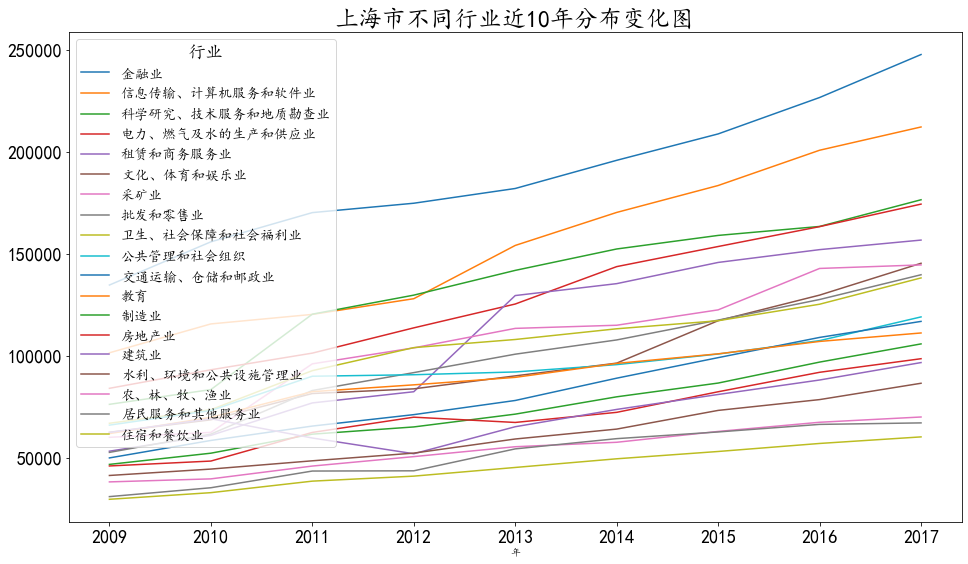

In [160]:
原.set_index(["地区","行业","年"])\
       .unstack()\
       .loc["上海市"]\
.dropna(axis=1)\
.sort_values (by=('数据',2017),ascending=False)\
.droplevel(None, axis=1)\
.T\
.plot(figsize=(16,9),title='上海市不同行业近10年分布变化图')

In [59]:
df_就业切片.groupby(['地区','行业','行业指标']).agg({"数据": ["min","mean","max"]})

数据                           
                                   min          mean          max
地区   行业             行业指标                                         
上海市  交通运输、仓储及邮电通信业  人员         35.6329     45.014167      51.4541
     交通运输、仓储和邮政业    人员平均工资  49847.0000  81817.888889  116763.0000
     住宿和餐饮业         人员         10.8191     19.851000      25.5494
                    人员平均工资  29564.0000  45158.777778   60153.0000
     信息传输、计算机服务和软件业 人员          6.5150     17.706767      30.7312
...                                ...           ...          ...
黑龙江省 租赁和商务服务业       人员平均工资  21157.0000  38601.444444   56493.0000
     采矿业            人员         25.5592     36.610556      43.4887
                    人员平均工资  33417.0000  51564.777778   68926.0000
     金融业            人员         13.4821     17.099533      22.6548
                    人员平均工资  37056.0000  55194.888889   66790.0000

[1178 rows x 3 columns]

* 多层次数据分组出报表

In [25]:
df_就业切片.to_csv("就业切片.tsv", encoding="utf8", sep="\t")

In [26]:
df_就业切片.to_csv("就业切片.tsv", encoding="utf8", sep="\t")
人员平均工资 = df_就业切片.query("行业指标=='人员平均工资'")

In [27]:
# 行业人员平均工资从高到低
人员平均工资.groupby(['行业','地区']).agg({"数据":["min","mean","max"]}).sort_values(by=('数据','mean'),ascending=False)

数据                         
                           min           mean       max
行业             地区                                      
金融业            北京市    143187.0  204188.555556  253637.0
               上海市    134581.0  188385.000000  247568.0
信息传输、计算机服务和软件业 上海市    101367.0  153913.666667  212063.0
               北京市    100794.0  139098.888889  183183.0
金融业            西藏自治区   76650.0  133585.222222  186085.0
...                        ...            ...       ...
水利、环境和公共设施管理业  山西省     15831.0   23166.111111   30961.0
农、林、牧、渔业       西藏自治区   13522.0   22214.888889   41370.0
               黑龙江省    11079.0   21949.555556   30638.0
               河北省     11330.0   16067.333333   23327.0
               辽宁省      8832.0   12813.111111   17027.0

[589 rows x 3 columns]

In [28]:
人员平均工资.groupby(['地区']).agg({"数据":["min","mean","max"]}).sort_values(by=('数据','mean'),ascending=False)

数据                        
              min          mean       max
地区                                       
上海市       29564.0  95373.456140  247568.0
北京市       25006.0  89086.046784  253637.0
天津市       20992.0  73773.017544  151778.0
浙江省       22456.0  66680.111111  165532.0
广东省       14469.0  63142.736842  149936.0
江苏省       17904.0  61104.783626  143002.0
西藏自治区     13522.0  60094.643275  186085.0
福建省       15790.0  52346.286550  109757.0
重庆市       17129.0  52280.444444  126739.0
山东省       19568.0  50366.672515   94704.0
新疆维吾尔自治区  16022.0  50234.625731  105881.0
四川省       17748.0  49618.280702  101514.0
青海省       16825.0  49264.678363  100823.0
宁夏回族自治区   15529.0  49129.701754  103768.0
内蒙古自治区    15017.0  47498.690058   85135.0
贵州省       16895.0  47309.122807  141959.0
海南省       10855.0  47224.847953  124017.0
陕西省       16338.0  46612.181287  130891.0
安徽省       13437.0  45770.783626   98235.0
湖北省       15777.0  45400.081871  101551.0
辽宁省        8832.0  45122.994152   91990.0
云南省       14853.0  44699.356725  130774.0
湖南省       14519.0  43279.467836   99320.0
广西壮族自治区   15397.0  43223.590643   96818.0
河北省       11330.0  42770.233918  109196.0
黑龙江省      11079.0  42505.538012   73978.0
江西省       15049.0  42360.959064   84304.0
甘肃省       15163.0  40974.327485   85197.0
河南省       15718.0  40797.461988  103314.0
吉林省       13636.0  40642.450292   87154.0
山西省       13455.0  40518.602339   80556.0

In [29]:
_df_ = 人员平均工资.groupby(['行业']).agg({"数据":["min","mean","max"]})
display(人员平均工资)
display(_df_)
print (_df_.columns)

,指标,地区,年,数据,行业,行业指标
5890,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2018,NaN,农、林、牧、渔业,人员平均工资
5891,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2017,55218.0,农、林、牧、渔业,人员平均工资
5892,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2016,51941.0,农、林、牧、渔业,人员平均工资
5893,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2015,50797.0,农、林、牧、渔业,人员平均工资
5894,农、林、牧、渔业城镇单位就业人员平均工资,北京市,2014,49478.0,农、林、牧、渔业,人员平均工资
...,...,...,...,...,...,...
11775,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2013,46636.0,公共管理和社会组织,人员平均工资
11776,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2012,45071.0,公共管理和社会组织,人员平均工资
11777,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2011,39862.0,公共管理和社会组织,人员平均工资
11778,公共管理和社会组织城镇单位就业人员平均工资,新疆维吾尔自治区,2010,35950.0,公共管理和社会组织,人员平均工资


数据                        
                     min          mean       max
行业                                              
交通运输、仓储和邮政业      25098.0  56241.240143  116763.0
住宿和餐饮业           13455.0  31198.731183   61095.0
信息传输、计算机服务和软件业   22186.0  72507.896057  212063.0
公共管理和社会组织        25275.0  55019.594982  128855.0
农、林、牧、渔业          8832.0  30661.906810   74975.0
制造业              21508.0  45198.247312  106835.0
卫生、社会保障和社会福利业    22302.0  59073.053763  169191.0
居民服务和其他服务业       16022.0  35929.476703   67013.0
建筑业              16423.0  40809.896057   99718.0
房地产业             15938.0  45288.530466  120379.0
批发和零售业           16073.0  44120.035842  139627.0
教育               26175.0  57414.487455  143215.0
文化、体育和娱乐业        22377.0  54176.698925  150810.0
水利、环境和公共设施管理业    15831.0  36995.433692   95341.0
电力、燃气及水的生产和供应业   29419.0  67744.182796  174252.0
科学研究、技术服务和地质勘查业  26211.0  66216.186380  176383.0
租赁和商务服务业         16691.0  43966.784946  156621.0
采矿业              22732.0  56747.756272  144454.0
金融业              30627.0  86977.516129  253637.0

MultiIndex([('数据',  'min'),
            ('数据', 'mean'),
            ('数据',  'max')],
           )


In [30]:
人员平均工资.groupby(['行业']).agg({"数据":["min","mean","max"]}).columns

MultiIndex([('数据',  'min'),
            ('数据', 'mean'),
            ('数据',  'max')],
           )

## 不同行业地区的平均工资

In [31]:
人员平均工资.groupby(['地区','行业']).agg({"数据":["min","mean","max"]}).sort_values(by=('数据','mean'), ascending=False).head(10)

数据                         
                            min           mean       max
地区    行业                                                
北京市   金融业              143187.0  204188.555556  253637.0
上海市   金融业              134581.0  188385.000000  247568.0
      信息传输、计算机服务和软件业   101367.0  153913.666667  212063.0
北京市   信息传输、计算机服务和软件业   100794.0  139098.888889  183183.0
西藏自治区 金融业               76650.0  133585.222222  186085.0
上海市   科学研究、技术服务和地质勘查业   76108.0  133555.111111  176383.0
      电力、燃气及水的生产和供应业    83958.0  127959.666667  174252.0
浙江省   金融业               84714.0  117956.000000  132411.0
广东省   金融业               84721.0  115820.555556  149936.0
北京市   科学研究、技术服务和地质勘查业   77632.0  114464.555556  150611.0

In [32]:
df_就业切片
df_就业切片.groupby(['行业','行业指标','地区']).agg({"数据":["min","mean","max"]})

数据                           
                                    min          mean          max
行业            行业指标   地区                                           
交通运输、仓储及邮电通信业 人员     上海市        35.6329     45.014167      51.4541
                     云南省        13.4000     15.667100      17.8598
                     内蒙古自治区     16.2429     19.266189      22.7777
                     北京市        50.0662     56.857056      60.2262
                     吉林省        14.2939     15.836233      17.1587
...                                 ...           ...          ...
金融业           人员平均工资 辽宁省     45038.0000  70013.222222   85433.0000
                     重庆市     49871.0000  95005.666667  126739.0000
                     陕西省     46122.0000  66379.888889   86024.0000
                     青海省     37456.0000  67431.111111   98911.0000
                     黑龙江省    37056.0000  55194.888889   66790.0000

[1178 rows x 3 columns]

## 多层次数据分组出报表

In [33]:
# 多层次数据分组出报表
统一字词 = {"交通运输、仓储及邮电通信业":"交通运输、仓储和邮政业","交通运输、仓储和邮政业":"交通运输、仓储和邮政业","农、林、牧、渔业":"农林牧渔业","教育":"教育业","教育业业":"教育业"}
df_就业切片_新 = df_就业切片.set_index('行业').rename (index=统一字词).reset_index()
df_就业切片_新.行业.unique()

array(['农林牧渔业', '采矿业', '制造业', '电力、燃气及水的生产和供应业', '建筑业', '交通运输、仓储和邮政业',
       '信息传输、计算机服务和软件业', '批发和零售业', '住宿和餐饮业', '金融业', '房地产业', '租赁和商务服务业',
       '科学研究、技术服务和地质勘查业', '水利、环境和公共设施管理业', '居民服务和其他服务业', '教育业',
       '卫生、社会保障和社会福利业', '文化、体育和娱乐业', '公共管理和社会组织'], dtype=object)

In [34]:
df_就业切片_新.groupby(['行业','行业指标']).agg({"数据":["min","mean","max"]})

数据                           
                               min          mean          max
行业              行业指标                                         
交通运输、仓储和邮政业     人员          0.5997     24.556320      85.3999
                人员平均工资  25098.0000  56241.240143  116763.0000
住宿和餐饮业          人员          0.3000      8.331891      39.3419
                人员平均工资  13455.0000  31198.731183   61095.0000
信息传输、计算机服务和软件业  人员          0.2235      9.204604      77.4400
                人员平均工资  22186.0000  72507.896057  212063.0000
公共管理和社会组织       人员          7.8169     50.301842     116.1762
                人员平均工资  25275.0000  55019.594982  128855.0000
农林牧渔业           人员          0.3089     10.091744      93.9292
                人员平均工资   8832.0000  30661.906810   74975.0000
制造业             人员          0.6612    145.443355    1020.2491
                人员平均工资  21508.0000  45198.247312  106835.0000
卫生、社会保障和社会福利业   人员          1.3830     24.421601      65.8223
                人员平均工资  22302.0000  59073.053763  169191.0000
居民服务和其他服务业      人员          0.0557      2.277055      11.0436
                人员平均工资  16022.0000  35929.476703   67013.0000
建筑业             人员          0.5018     72.355329     450.1977
                人员平均工资  16423.0000  40809.896057   99718.0000
房地产业            人员          0.0249     10.849628      66.3147
                人员平均工资  15938.0000  45288.530466  120379.0000
批发和零售业          人员          0.4833     24.356891     102.7835
                人员平均工资  16073.0000  44120.035842  139627.0000
教育业             人员          3.9384     53.813387     127.4604
                人员平均工资  26175.0000  57414.487455  143215.0000
文化、体育和娱乐业       人员          0.5999      4.581411      19.0189
                人员平均工资  22377.0000  54176.698925  150810.0000
水利、环境和公共设施管理业   人员          0.1636      8.022701      18.2523
                人员平均工资  15831.0000  36995.433692   95341.0000
电力、燃气及水的生产和供应业  人员          0.7362     11.707497      32.1821
                人员平均工资  29419.0000  67744.182796  174252.0000
科学研究、技术服务和地质勘查业 人员          0.6790     11.614666      71.2481
                人员平均工资  26211.0000  66216.186380  176383.0000
租赁和商务服务业        人员          0.1000     12.672472      88.2695
                人员平均工资  16691.0000  43966.784946  156621.0000
采矿业             人员          0.0523     18.220504     103.0136
                人员平均工资  22732.0000  56747.756272  144454.0000
金融业             人员          0.7717     17.982375      54.4498
                人员平均工资  30627.0000  86977.516129  253637.0000

In [35]:
df_就业切片_新.pivot_table(index='行业', columns='行业指标', values='数据').sort_values('人员平均工资', ascending=False)

行业指标,人员,人员平均工资
行业,,
金融业,17.982375,86977.516129
信息传输、计算机服务和软件业,9.204604,72507.896057
电力、燃气及水的生产和供应业,11.707497,67744.182796
科学研究、技术服务和地质勘查业,11.614666,66216.186380
卫生、社会保障和社会福利业,24.421601,59073.053763
教育业,53.813387,57414.487455
采矿业,18.220504,56747.756272
交通运输、仓储和邮政业,24.556320,56241.240143
公共管理和社会组织,50.301842,55019.594982


# 尝试找其他数据分析实践

In [2]:
import pandas as pd
df_raw = pd.read_csv("fsnd_zb_data.tsv", encoding='utf8', sep='\t',
                    keep_default_na=False, na_values = 'na_rep',
                    index_col = [0,1,2] )
df_m = pd.read_csv("fsnd_zb_meta.tsv", encoding='utf8', sep='\t',)
df_r = pd.read_csv("reg_treeId_level2.tsv", encoding='utf8', sep='\t')
display(df_raw)

data
zb      reg    sj             
A010101 110000 2018        NaN
               2017        NaN
               2016        NaN
               2015        NaN
               2014        NaN
...                        ...
A0S0B05 650000 2013  33.856600
               2012  24.914044
               2011        NaN
               2010        NaN
               2009        NaN

[908300 rows x 1 columns]

In [4]:
指标字典 = df_m.set_index("code")['cname'].to_dict()
指标字典
地区字典 = df_r.set_index("id")['name'].to_dict()
地区字典

{110000: '北京市',
 120000: '天津市',
 130000: '河北省',
 140000: '山西省',
 150000: '内蒙古自治区',
 210000: '辽宁省',
 220000: '吉林省',
 230000: '黑龙江省',
 310000: '上海市',
 320000: '江苏省',
 330000: '浙江省',
 340000: '安徽省',
 350000: '福建省',
 360000: '江西省',
 370000: '山东省',
 410000: '河南省',
 420000: '湖北省',
 430000: '湖南省',
 440000: '广东省',
 450000: '广西壮族自治区',
 460000: '海南省',
 500000: '重庆市',
 510000: '四川省',
 520000: '贵州省',
 530000: '云南省',
 540000: '西藏自治区',
 610000: '陕西省',
 620000: '甘肃省',
 630000: '青海省',
 640000: '宁夏回族自治区',
 650000: '新疆维吾尔自治区'}

In [10]:
df = df_raw.reset_index().set_index("zb").rename(index=指标字典)
df
df = df.reset_index().set_index("reg").rename(index=地区字典)
df
df_zh = df.reset_index().rename(columns={"zb":"指标","reg":"地区","sj":"年","data":"数据"})
df_zh
df_zh.set_index('指标').loc["私营企业和个体就业人员","年":"数据"]

,年,数据
指标,,
私营企业和个体就业人员,2018,NaN
私营企业和个体就业人员,2017,1141.3759
私营企业和个体就业人员,2016,1046.7365
私营企业和个体就业人员,2015,951.7309
私营企业和个体就业人员,2014,828.5921
...,...,...
私营企业和个体就业人员,2013,227.1401
私营企业和个体就业人员,2012,211.6810
私营企业和个体就业人员,2011,171.5281


In [11]:
dslice = df_zh [ df_zh.指标.str.contains("私营企业和个体就业人员")]
dslice
指标分的可能性 = dslice.指标.unique()
指标分的可能性
指标分的可能性 = [ x.split("私营企业和个体就业") for x in dslice.指标.unique()]
指标分的可能性

[['', '人员'],
 ['制造业', '人员'],
 ['建筑业', '人员'],
 ['交通运输、仓储和邮政业', '人员'],
 ['批发和零售业', '人员'],
 ['住宿和餐饮业', '人员'],
 ['租赁和商务服务业', '人员'],
 ['居民服务和其他服务业', '人员'],
 ['城镇', '人员'],
 ['制造业城镇', '人员'],
 ['建筑业城镇', '人员'],
 ['交通运输、仓储和邮政业城镇', '人员'],
 ['批发和零售业城镇', '人员'],
 ['住宿和餐饮业城镇', '人员'],
 ['租赁和商务服务业城镇', '人员'],
 ['居民服务和其他服务业城镇', '人员']]

In [14]:
指标分的可能性_取 = [ [x,y] for (x,y) in 指标分的可能性 if (y=='私营企业和个体就业人数' or y=='人员') and x!='']
指标分的可能性_取

[['制造业', '人员'],
 ['建筑业', '人员'],
 ['交通运输、仓储和邮政业', '人员'],
 ['批发和零售业', '人员'],
 ['住宿和餐饮业', '人员'],
 ['租赁和商务服务业', '人员'],
 ['居民服务和其他服务业', '人员'],
 ['城镇', '人员'],
 ['制造业城镇', '人员'],
 ['建筑业城镇', '人员'],
 ['交通运输、仓储和邮政业城镇', '人员'],
 ['批发和零售业城镇', '人员'],
 ['住宿和餐饮业城镇', '人员'],
 ['租赁和商务服务业城镇', '人员'],
 ['居民服务和其他服务业城镇', '人员']]

In [21]:
指标分的可能性_取_all = ["私营企业和个体就业".join(x) for x in 指标分的可能性_取]
指标分的可能性_取_all

['制造业私营企业和个体就业人员',
 '建筑业私营企业和个体就业人员',
 '交通运输、仓储和邮政业私营企业和个体就业人员',
 '批发和零售业私营企业和个体就业人员',
 '住宿和餐饮业私营企业和个体就业人员',
 '租赁和商务服务业私营企业和个体就业人员',
 '居民服务和其他服务业私营企业和个体就业人员',
 '城镇私营企业和个体就业人员',
 '制造业城镇私营企业和个体就业人员',
 '建筑业城镇私营企业和个体就业人员',
 '交通运输、仓储和邮政业城镇私营企业和个体就业人员',
 '批发和零售业城镇私营企业和个体就业人员',
 '住宿和餐饮业城镇私营企业和个体就业人员',
 '租赁和商务服务业城镇私营企业和个体就业人员',
 '居民服务和其他服务业城镇私营企业和个体就业人员']

In [22]:
df_就业切片 = df_zh.set_index("指标").loc[指标分的可能性_取_all].reset_index()
df_就业切片
df_就业切片.describe(include="all")

,指标,地区,年,数据
count,4650,4650,4650.00000,4185.000000
unique,15,31,NaN,NaN
top,批发和零售业私营企业和个体就业人员,海南省,NaN,NaN
freq,310,150,NaN,NaN
mean,NaN,NaN,2013.50000,105.366029
std,NaN,NaN,2.87259,212.560007
min,NaN,NaN,2009.00000,0.542800
25%,NaN,NaN,2011.00000,14.461700
50%,NaN,NaN,2013.50000,35.011000
75%,NaN,NaN,2016.00000,90.786100


In [23]:
df_就业切片.groupby(['指标']).agg({"数据":["min","mean","max"]})

数据                       
                              min        mean        max
指标                                                      
交通运输、仓储和邮政业城镇私营企业和个体就业人员   0.5428   13.525903   119.2966
交通运输、仓储和邮政业私营企业和个体就业人员     0.6973   20.579146   146.2737
住宿和餐饮业城镇私营企业和个体就业人员        4.0266   36.561596   213.4798
住宿和餐饮业私营企业和个体就业人员          4.9581   49.487173   253.2948
制造业城镇私营企业和个体就业人员           1.6559   80.676713   626.4597
制造业私营企业和个体就业人员             1.9071  154.111623  1027.6005
城镇私营企业和个体就业人员             28.5897  499.218994  3551.1260
居民服务和其他服务业城镇私营企业和个体就业人员    2.4807   31.183135   202.5668
居民服务和其他服务业私营企业和个体就业人员      2.9109   43.049331   229.3051
建筑业城镇私营企业和个体就业人员           1.3768   23.298285   203.1463
建筑业私营企业和个体就业人员             2.5022   33.680041   295.1608
批发和零售业城镇私营企业和个体就业人员       12.5816  209.287668  1688.3208
批发和零售业私营企业和个体就业人员         14.3978  298.110606  1903.1140
租赁和商务服务业城镇私营企业和个体就业人员      0.5689   38.804881   340.9577
租赁和商务服务业私营企业和个体就业人员        0.7060   48.915340   367.8048

In [25]:
df_就业切片['行业'] = [x.split("私营企业和个体就业")[0] for x in df_就业切片.指标]
df_就业切片['行业指标'] = [x.split("私营企业和个体就业")[1] for x in df_就业切片.指标]
df_就业切片

,指标,地区,年,数据,行业,行业指标
0,制造业私营企业和个体就业人员,北京市,2018,NaN,制造业,人员
1,制造业私营企业和个体就业人员,北京市,2017,55.2542,制造业,人员
2,制造业私营企业和个体就业人员,北京市,2016,53.9461,制造业,人员
3,制造业私营企业和个体就业人员,北京市,2015,55.2288,制造业,人员
4,制造业私营企业和个体就业人员,北京市,2014,55.6678,制造业,人员
...,...,...,...,...,...,...
4645,居民服务和其他服务业城镇私营企业和个体就业人员,新疆维吾尔自治区,2013,12.7154,居民服务和其他服务业城镇,人员
4646,居民服务和其他服务业城镇私营企业和个体就业人员,新疆维吾尔自治区,2012,11.3574,居民服务和其他服务业城镇,人员
4647,居民服务和其他服务业城镇私营企业和个体就业人员,新疆维吾尔自治区,2011,12.4598,居民服务和其他服务业城镇,人员
4648,居民服务和其他服务业城镇私营企业和个体就业人员,新疆维吾尔自治区,2010,11.3856,居民服务和其他服务业城镇,人员


In [26]:
df_就业切片.groupby(['地区','行业','行业指标']).agg({"数据": ["min","mean","max"]})

数据                      
                              min        mean       max
地区   行业            行业指标                                
上海市  交通运输、仓储和邮政业   人员     20.9766   30.012211   42.4639
     交通运输、仓储和邮政业城镇 人员     12.9324   16.635022   21.9234
     住宿和餐饮业        人员     17.8088   19.891567   25.2653
     住宿和餐饮业城镇      人员     15.0100   16.531433   19.6362
     制造业           人员    130.1897  133.185567  139.8201
...                           ...         ...       ...
黑龙江省 建筑业城镇         人员      3.8017    8.961911   13.9331
     批发和零售业        人员    139.1599  184.739056  251.9026
     批发和零售业城镇      人员    103.2681  142.822889  191.1145
     租赁和商务服务业      人员      8.9052   16.431878   26.3435
     租赁和商务服务业城镇    人员      7.6288   13.573378   19.4389

[465 rows x 3 columns]

In [29]:
df_就业切片.to_csv("就业切片.tsv", encoding="utf8", sep="\t")
私营企业和个体就业人数 = df_就业切片.query("行业指标=='私营企业和个体就业人数'")
#私营企业和个体就业人数.groupby(['地区']).agg({"数据":["min","mean","max"]}).sort_values(by=('数据','mean'),ascending=False)

http://data.stats.gov.cn/easyquery.htm?cn=E0102